# 데이터 가져오기

## 감성대화 말뭉치
https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86
- 일반인 1,500명 대상의 인터뷰 및 크라우드 소싱 수행
- 우울증 환자 대상 WOZ 대화 수집

=> 전처리 과정으로 "한사람만의 대화를 줄글로 변형 - 질문 제거"

In [ ]:
# Matplotlib 와 pandas 그래프에서 한글 사용 설정
import sys

## 노트북이 코랩에서 실행중인지 체크
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninterative' | debconf-set-selections
  ## 나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

  # 나눔바른고딕 폰트 설정
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  # 마이너스 기호 표시 오류 수정
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False


debconf: unable to initialize frontend: Noninterative
debconf: (Can't locate Debconf/FrontEnd/Noninterative.pm in @INC (you may need to install the Debconf::FrontEnd::Noninterative module) (@INC contains: /etc/perl /usr/local/lib/x86_64-linux-gnu/perl/5.34.0 /usr/local/share/perl/5.34.0 /usr/lib/x86_64-linux-gnu/perl5/5.34 /usr/share/perl5 /usr/lib/x86_64-linux-gnu/perl-base /usr/lib/x86_64-linux-gnu/perl/5.34 /usr/share/perl/5.34 /usr/local/lib/site_perl) at (eval 17) line 2, <> line 1.)
debconf: falling back to frontend: Noninteractive
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

train = pd.read_excel("/content/drive/MyDrive/0000/Class/졸프/Dataset/AIhub_감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.xlsx")
valid = pd.read_excel("/content/drive/MyDrive/0000/Class/졸프/Dataset/AIhub_감성대화/Validation_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Validation.xlsx")

In [ ]:
train_df = train.copy()
valid_df = valid.copy()

## EDA

### text EDA

In [ ]:
train.iloc[:,5:]

,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...,...
51625,분노,성가신,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,경제적인 문제 때문에 막막하시군요. 마음이 편치 않으시겠어요.,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,지금 할 수 있는 가장 합리적인 행동은 무엇인가요?,노년층을 위한 경제적 지원이나 부업 같은 것도 알아보아야겠어.,좋은 결과 얻으시길 바랄게요.
51626,불안,초조한,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,건강에 대한 어려움 때문에 기분이 좋지 않으시군요. 속상하시겠어요.,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,어떻게 하면 지금의 기분을 나아지게 할 수 있을까요?,남편과 함께 게이트볼이나 치러 가야겠어. 그럼 기분이 나아질 것 같아.,남편과 함께하는 좋은 외출 시간 되시길 바랄게요.
51627,상처,희생된,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,노후 준비에 대한 어려움 때문에 걱정이 많으시겠어요.,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,지금의 상황에서 할 수 있는 가장 좋은 행동이 무엇일까요?,남편과 함께 실버 일자리나 노년층을 위한 국가 지원에 대해 자세히 알아보아야겠어.,좋은 정보 많이 얻으셔서 걱정을 좀 덜으셨으면 좋겠어요.
51628,불안,걱정스러운,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,가족과의 문제 때문에 속상하시겠어요.,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,지금의 감정을 나아지게 할 수 있는 어떤 방법이 있을까요?,함께 친하게 지내던 동네 언니 동생들과 빈자리를 조금이나마 채울까 해.,지인분들과 좋은 시간 보내셨으면 좋겠어요.


In [ ]:
# 문장 병합
train.fillna('',inplace=True)
train['text'] = train['사람문장1']+train['사람문장2']+train['사람문장3']

text = train[['text','감정_대분류']]
text['len'] = text['text'].apply(len)
text

<ipython-input-6-4daca234b407>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['len'] = text['text'].apply(len)


,text,감정_대분류,len
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.그냥 내가 해결하는 게 나아. 남들한테...,분노,60
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....,분노,94
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노,119
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노,87
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.상사인 나에게 먼...,분노,72
...,...,...,...
51625,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고....,분노,112
51626,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.마음 ...,불안,123
51627,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정...,상처,143
51628,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가...,불안,126


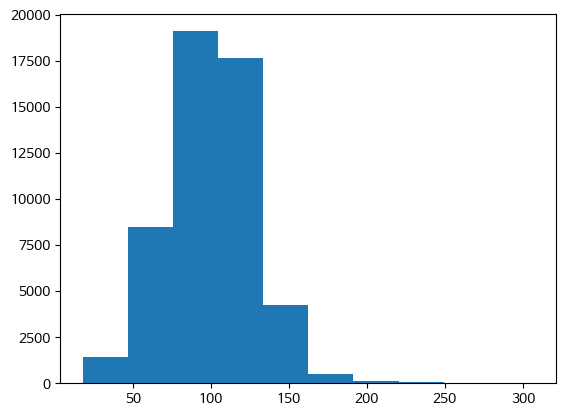

In [ ]:
# text데이터에 대한 문장 길이 분포
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(text['len'])
plt.show()

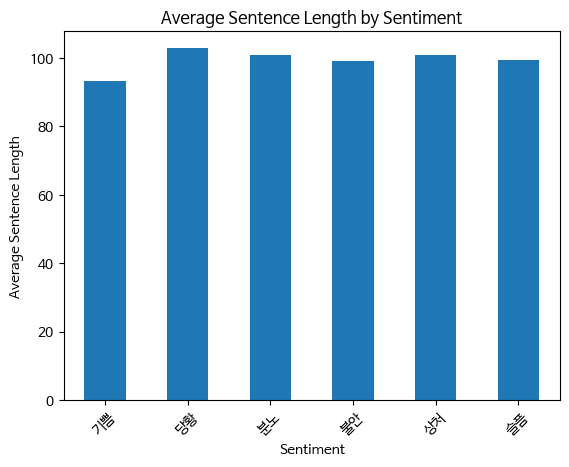

In [ ]:
# 각 소분류에 대한 평균 문장 길이 계산-train
mean_len = text.groupby('감정_대분류')['len'].mean()

mean_len.plot(kind='bar')
plt.title('Average Sentence Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Sentence Length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
text['text'][42]

'나 너무 우울해. 회사에서 큰 실수를 했어.해야 하는 일이 있었는데 잊고 있다가 상사에게 크게 혼이 났어. 이렇게 혼난 건 처음이라 상처받았어.'

### sentiment EDA

In [ ]:
sent = train[['감정_대분류','감정_소분류']]
sent

,감정_대분류,감정_소분류
0,분노,노여워하는
1,분노,노여워하는
2,분노,노여워하는
3,분노,노여워하는
4,분노,노여워하는
...,...,...
51625,분노,성가신
51626,불안,초조한
51627,상처,희생된
51628,불안,걱정스러운


In [ ]:
grouped = sent.groupby('감정_대분류')
grouped['감정_소분류'].count()

감정_대분류
기쁨    6126
당황    8756
분노    9160
불안    9320
상처    9143
슬픔    9125
Name: 감정_소분류, dtype: int64

In [ ]:
sent_category = sent.groupby('감정_대분류')['감정_소분류'].value_counts()
sent_category = pd.DataFrame(sent_category)
sent_category

count
감정_대분류 감정_소분류            
기쁨     기쁨             660
       만족스러운          655
       안도             639
       신이 난           634
       감사하는           631
       신뢰하는           609
       편안한            597
       자신하는           570
       느긋             568
       흥분             563
당황     한심한            918
       고립된            900
       부끄러운           897
       죄책감의           883
       남의 시선을 의식하는    872
       혼란스러운          870
       외로운            865
       당황             859
       열등감            859
       혐오스러운          833
분노     짜증내는          1054
       노여워하는          975
       성가신            969
       분노             958
       툴툴대는           926
       구역질 나는         882
       좌절한            875
       안달하는           873
       악의적인           845
       방어적인           803
불안     걱정스러운         1229
       두려운            991
       스트레스 받는        971
       혼란스러운          901
       초조한            900
       불안             893
       조심스러운          869
       취약한            864
       회의적인           860
       당혹스러운          842
상처     억울한            984
       괴로워하는          953
       가난한, 불우한       949
       상처             937
       배신당한           911
       충격 받은          910
       고립된            902
       질투하는           896
       버려진            861
       희생된            840
슬픔     우울한           1002
       눈물이 나는         993
       슬픔             958
       비통한            950
       후회되는           906
       낙담한            896
       환멸을 느끼는        884
       실망한            870
       마비된            838
       염세적인           828

## 전처리

In [ ]:
# "사람문장3" 결측값 대체
train_df.fillna('',inplace=True)
valid_df.fillna('',inplace=True)

# 문장 병합
train_df['사람문장'] = train_df['사람문장1']+train_df['사람문장2']+train_df['사람문장3']
valid_df['사람문장'] = valid_df['사람문장1']+valid_df['사람문장2']+valid_df['사람문장3']

# "감정 분류"과 "문장"만 추출
train_df = train_df[['사람문장', '감정_대분류']]
valid_df = valid_df[['사람문장', '감정_대분류']]

# 컬럼명 변경
train_df.rename(columns={'사람문장': 'text',
                   '감정_대분류': 'sentiment'}, inplace=True)
valid_df.rename(columns={'사람문장': 'text',
                   '감정_대분류': 'sentiment'}, inplace=True)

<ipython-input-13-fe74dd50fa53>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'사람문장': 'text',
<ipython-input-13-fe74dd50fa53>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df.rename(columns={'사람문장': 'text',


In [ ]:
train_df

,text,sentiment
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.그냥 내가 해결하는 게 나아. 남들한테...,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나....,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.상사인 나에게 먼...,분노
...,...,...
51625,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고....,분노
51626,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.마음 ...,불안
51627,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정...,상처
51628,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가...,불안


In [ ]:
valid_df

,text,sentiment
0,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,불안
1,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.나에게 너무 크게...,불안
2,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.무섭게 생겼는데도 업무를 보려면...,불안
3,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.첫 직장이...,불안
4,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.내가 낯가림이 심해서 친해질 수 ...,불안
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아...,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.요...,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


## 데이터 전처리

### 분석기 설치

형태소 분석기 사용으로 Okt 적용. 한국어 형태소 분석을 위해 konlpy와 함께 적용
- Open Korean Text(오픈 한국어 텍스트)의 약자로, 한국어 형태소 분석을 위한 Konlpy의 하위 패키지 중 하나

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs('한국어 형태소 분석을 시작합니다.'))

['한국어', '형태소', '분석', '을', '시작', '합니다', '.']


### 제거

In [ ]:
# 불용어 제거
corpus1 = []
titles = list(train_df["text"].values)

for t in titles:
    for n in okt.nouns(t):
        if len(n) == 1:
            corpus1.append(n)

# list에서 set으로 -> 중복되는 단어 제거
corpus1 = set(corpus1)
corpus1

{'각',
 '간',
 '감',
 '갑',
 '값',
 '갓',
 '강',
 '개',
 '객',
 '갸',
 '걔',
 '걘',
 '걜',
 '거',
 '건',
 '걸',
 '검',
 '겁',
 '것',
 '겉',
 '게',
 '겨',
 '격',
 '견',
 '결',
 '겸',
 '겹',
 '경',
 '곁',
 '계',
 '곘',
 '고',
 '곡',
 '곤',
 '곧',
 '골',
 '곱',
 '곳',
 '공',
 '과',
 '관',
 '괜',
 '교',
 '구',
 '국',
 '군',
 '굴',
 '굽',
 '굿',
 '궁',
 '궂',
 '권',
 '귀',
 '규',
 '균',
 '귤',
 '그',
 '극',
 '글',
 '금',
 '급',
 '기',
 '길',
 '김',
 '깃',
 '깝',
 '깡',
 '깨',
 '꺽',
 '껄',
 '껌',
 '껏',
 '껜',
 '꼭',
 '꼰',
 '꼴',
 '꼽',
 '꽃',
 '꽉',
 '꽝',
 '꽤',
 '꾀',
 '꾹',
 '꾼',
 '꿀',
 '꿈',
 '꿰',
 '뀌',
 '뀔',
 '끈',
 '끌',
 '끝',
 '끼',
 '낌',
 '나',
 '낙',
 '난',
 '날',
 '남',
 '납',
 '낫',
 '낭',
 '낮',
 '낯',
 '내',
 '낼',
 '냉',
 '너',
 '넉',
 '넋',
 '넌',
 '널',
 '네',
 '녀',
 '년',
 '노',
 '녹',
 '논',
 '놀',
 '놈',
 '놨',
 '뇌',
 '누',
 '눈',
 '눌',
 '느',
 '늘',
 '능',
 '늦',
 '늪',
 '니',
 '닉',
 '닌',
 '님',
 '다',
 '단',
 '달',
 '닭',
 '담',
 '답',
 '당',
 '댁',
 '댐',
 '댓',
 '댕',
 '더',
 '덕',
 '던',
 '덜',
 '덤',
 '덧',
 '덩',
 '데',
 '덴',
 '델',
 '도',
 '독',
 '돈',
 '돌',
 '동',
 '두',
 '둘',
 '둥',
 '뒤',
 '드',
 '득',
 '들'

In [ ]:
def stopwords(text):
    stop_words = "만 지만 만큼 성큼 그만큼 이만큼 에 등 듯 외 의 정말 것 같다 관한 그래서 그렇게 그렇다 그렇지 때 때문에 때문 를 마저 부터 어느 어떻게 에서 으로서 와 과 할때 할 때 혹시 혹시나 해요 했어요 이다 이 가 을 를 은 는 에게 되다 하다 하다가 뿐 대하여 관하여 과연 그래도 그리고 및 결국 좀 자마자 곧 로부터 동안 해야 그 저 우선"
    stop_words = stop_words.split(' ')

    word_tokens = word_tokenize(text)
    result = []
    for w in word_tokens:
        if w not in stop_words:
            result.append(w)
            n_text = " ".join(result)
    return n_text

In [ ]:
import re
def clean_text(text):
    # 한글 (자음, 모음), 영문(소문자, 대문자), 숫자만 남김, 중복생성된 공백 삭제
    text_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\s.%]", " ", text)
    text_clean = re.sub(" +", " ", text_clean)
    # 문자열 시작과 끝에 있는 공백 제거
    text_clean = text_clean.strip()
    return text_clean

In [ ]:
# 최종 전처리
def word_processing(text):
    # text = chinese_etc(text)
    # text = same_meaning(text)
    text = stopwords(text)
    # text = word_delete(text)
    text = clean_text(text)
    return text

## 데이터 증강
- 클래스 불균형 해소를 위해 데이터를 증강해야함

참고

https://team-ak.tistory.com/2

https://simonezz.tistory.com/92

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X_train,list(y_train))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

In [ ]:
X_resampled.shape, y_resampled.shape

# 모두의 말뭉치

In [ ]:
# "일기" 단어가 포함된 행을 추출하는 함수 정의
def extract_diary_rows(diary):
    return diary[diary['category'].str.contains('일기')]

In [ ]:
# 구두점 기반 토크나이저 함수 정의
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]', text) # 정규표현식을 사용하여 문장을 구두점을 기준으로 분리
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return len(sentences)

In [ ]:
diary = pd.read_csv("/content/drive/MyDrive/0000/Class/졸프/Dataset/모두의말뭉치/NIKL_NP.csv")
diary = diary.rename(columns={'file_id':'id','sentence': 'text'})

# "일기" 단어가 포함된 행 추출
diary = extract_diary_rows(diary)
diary = diary[['id','title','text_subclass','text']] # 컬럼 정리

# 텍스트 병합(조건 : 문장 길이 2 이상)
diary = diary.groupby('id')['text'].apply(lambda x: ' '.join(x)).reset_index() # 아이디를 기준으로 그룹화하여 텍스트를 합치기
diary['text_cnt'] = diary['text'].apply(count_sentences) # 텍스트 열에 적용하여 문장 개수를 계산하고 새로운 열로 추가
diary_df = diary[diary['text_cnt'] >= 2] # 문장 개수가 2 이상인 행만 선택하여 새로운 데이터프레임 생성
test_df = diary_df[['text']]
test_df

,text
1,졸업식이 취소되어서 너무 아쉽다. 취소 이유는 중국 우한에서 처음 발병한 신종 코로...
2,살 다 보니 어느 새 현역에서 은퇴하여 손주를 보며 즐거워하는 나이가 되었다. 지난...
3,일이 하기 싫다. 오늘은 늦게 일어나서 지각을 할 뻔했지만 지각을 하지 않았다. 다...
4,만약에 내가 로또에 당첨된다면 난 그 돈으로 무엇을 할지 가끔 고민해본다. 로또에...
5,어른들의 말이 문득 떠오른다... 크면 다 알게될꺼라는 말들 이제야 문득문득 어릴때...
...,...
4256,<할머니 집에 간 날> 나는 오늘 할머니네 집에 놀러 갔다.내가 수족구에 걸려서 나...
4257,8월 10일 금 요일 날씨: 불 타 오르도록더운날 나는 오늘 친구와 아빠동생나 하고...
4259,8월 7일 수요일 날씨:변덕스러운날씨 나는오 늘 도서관가학원 을 갔 다 온디 엄마 ...
4260,8월 3일 날씨:쨍쨍하 면 시비가 많이온날 오늘은 할아버지와할머니가 생신을 같 이 ...
